# Linear Regression: 
The model predicts price using a single feature, mileage, providing insight into the direct relationship between the predictor and the target.

# Multiple Linear Regrssion:
This model utilizes all available features to predict the target variable, simultaneously considering the contributions of multiple predictors.

# Polynomial Linear Regression:
The model incorporates polynomial terms in multiple linear regression, enabling it to identify non-linear relationships between predictors and the target variable.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load data from CSV file
cars_fill = pd.read_csv('pakwheels_used_car_data_v02.csv')

# Drop irrelevant columns
cars_fill = cars_fill.drop(['addref'], axis=1)

# Drop rows where the target variable (price) is NaN
cars_fill = cars_fill.dropna(subset=['price'])

# Define categorical features
categorical_features = [col for col in cars_fill.columns if 'city_' in col or 'registered_' in col or col == 'make']

# Split data into features (X) and target (y)
X = cars_fill.drop(['price'], axis=1)
y = cars_fill['price']

# Preprocess the data using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), ['year', 'engine', 'mileage']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Split data into training and testing sets
X_train_vehicle, X_test_vehicle, y_train_vehicle, y_test_vehicle = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to training and test data
X_train_vehicle = preprocessor.fit_transform(X_train_vehicle)
X_test_vehicle = preprocessor.transform(X_test_vehicle)

# 1. Simple Linear Regression (using 'mileage' as the single feature)
mileage_index = X.columns.get_loc('mileage')
X_train_mileage = X_train_vehicle[:, mileage_index].reshape(-1, 1)
X_test_mileage = X_test_vehicle[:, mileage_index].reshape(-1, 1)

linear_model = LinearRegression()
linear_model.fit(X_train_mileage, y_train_vehicle)
y_pred_linear = linear_model.predict(X_test_mileage)

# 2. Multiple Linear Regression
multi_linear_model = LinearRegression()
multi_linear_model.fit(X_train_vehicle, y_train_vehicle)
y_pred_multi_linear = multi_linear_model.predict(X_test_vehicle)

# 3. Polynomial Regression (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_vehicle)
X_test_poly = poly_features.transform(X_test_vehicle)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_vehicle)
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate models
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

mse_linear, r2_linear = evaluate_model(y_test_vehicle, y_pred_linear, "Linear Regression")
mse_multi_linear, r2_multi_linear = evaluate_model(y_test_vehicle, y_pred_multi_linear, "Multiple Linear Regression")
mse_poly, r2_poly = evaluate_model(y_test_vehicle, y_pred_poly, "Polynomial Regression")



# Evaluation and Comparison

Linear Regression - MSE: 28615963636562.57, R2 Score: -0.00
Multiple Linear Regression - MSE: 18078213994492.59, R2 Score: 0.37
Polynomial Regression - MSE: 18319529153556.07, R2 Score: 0.36


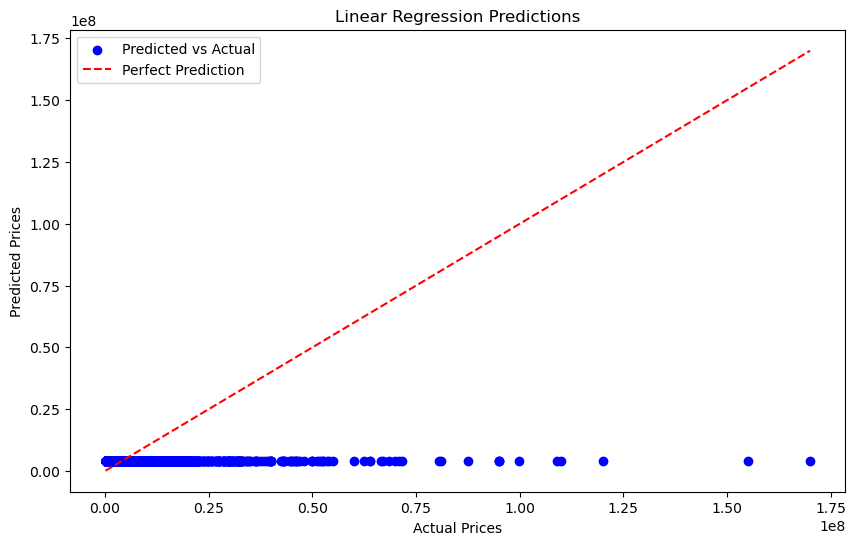

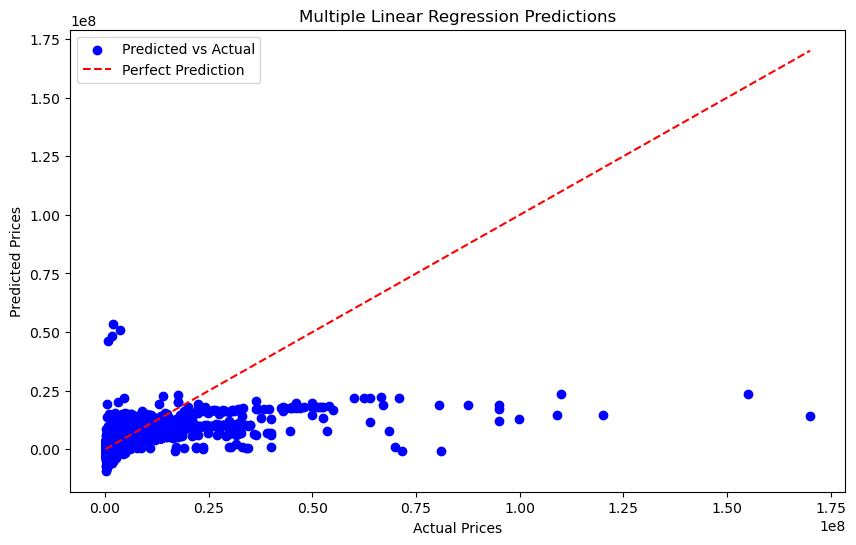

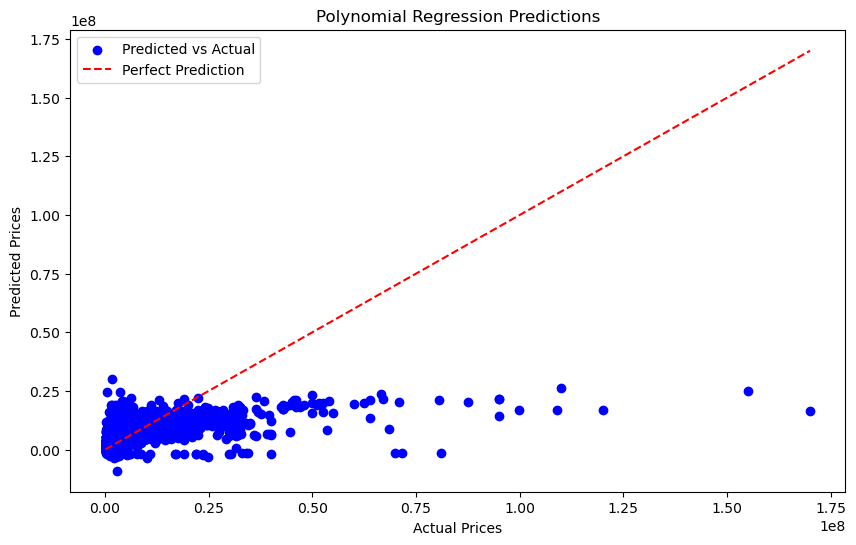

In [3]:
# Print evaluation results
print(f"Linear Regression - MSE: {mse_linear:.2f}, R2 Score: {r2_linear:.2f}")
print(f"Multiple Linear Regression - MSE: {mse_multi_linear:.2f}, R2 Score: {r2_multi_linear:.2f}")
print(f"Polynomial Regression - MSE: {mse_poly:.2f}, R2 Score: {r2_poly:.2f}")

# Visualization
def plot_predictions(y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(title)
    plt.legend()
    plt.show()

plot_predictions(y_test_vehicle, y_pred_linear, "Linear Regression Predictions")
plot_predictions(y_test_vehicle, y_pred_multi_linear, "Multiple Linear Regression Predictions")
plot_predictions(y_test_vehicle, y_pred_poly, "Polynomial Regression Predictions")
